In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as pth
import seaborn as sns
from astropy.stats import RipleysKEstimator
import sklearn.neighbors as sn
from shapely.geometry import Polygon
from itertools import compress
pd.options.display.max_colwidth=300
sns.set(style="white", context="poster")
plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [3]:
roiattr_files= !ls /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/*COORD.txt
files=pd.DataFrame(data=roiattr_files, columns=['RoiAttr'])
files['index']=files['RoiAttr'].map(lambda x: x[82:90]+ str('_') + x[121:123])
files.set_index('index', inplace=True)
files.head(3)

RoiAttr
index                                                                                                                                                                                                      
BB185_02_01   /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01_activeContourROI_4_RoiAttr_COORD.txt
BB185_02_02  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02_activeContourROI_13_RoiAttr_COORD.txt
BB185_02_02  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02_activeContourROI_16_RoiAttr_COORD.txt

In [4]:
roicoord_files=! ls /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/*.txt
files_coord=pd.DataFrame(data=roicoord_files, columns=['RoiCoord'])
files_coord['index']=files_coord['RoiCoord'].map(lambda x: x[83:91]+ str('_') + x[122:124])
files_coord.set_index('index', inplace=True)
files_coord.head(3)

RoiCoord
index                                                                                                                                                                           
BB185_02_01  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01CB_ROI.txt
BB185_02_02  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02CB_ROI.txt
BB185_02_03  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S03CB_ROI.txt

In [5]:
def group_id(Cell):
    if Cell=='BB185':
        return 'High'
    if Cell=='BB193':
        return 'High'
    if Cell=='BB192':
        return 'Ctrl'
    if Cell=='BB203':
        return 'Ctrl'
    if Cell == 'BB222':
        return 'Low'
    if Cell == 'BB226':
        return 'Low'
    if Cell == 'BB238':
        return 'Low'
    if Cell == 'BB239':
        return 'Low'

In [6]:
files['RoiCoord']=files.index.map(files_coord['RoiCoord'])
files['Cell']=files.index.map(lambda x: x[:5])
files['Group']=files['Cell'].apply(lambda cell: group_id(cell))
files.head()

RoiAttr  \
index                                                                                                                                                                                                         
BB185_02_01   /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01_activeContourROI_4_RoiAttr_COORD.txt   
BB185_02_02  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02_activeContourROI_13_RoiAttr_COORD.txt   
BB185_02_02  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02_activeContourROI_16_RoiAttr_COORD.txt   
BB185_02_03  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S03_activeContourROI_19_RoiAttr_COORD.txt   
BB185_02_03  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S03_activeContourROI_24_RoiAttr_COORD.txt   

                                                                                                                                                                        RoiCoord  \
index                                                                                                                                                                              
BB185_02_01  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01CB_ROI.txt   
BB185_02_02  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02CB_ROI.txt   
BB185_02_02  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02CB_ROI.txt   
BB185_02_03  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S03CB_ROI.txt   
BB185_02_03  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S03CB_ROI.txt   

              Cell Group  
index                     
BB185_02_01  BB185  High  
BB185_02_02  BB185  High  
BB185_02_02  BB185  High  
BB185_02_03  BB185  High  
BB185_02_03  BB185  High

In [7]:
def polygon_area(path):
    '''
Reads a coordinate file and returns a  polygon.
Needs  shapely
'''
    df=pd.read_csv(path, sep='\t', header='infer')
    roizip=zip(df.x, df.y)
    roilist=list(roizip)
    polyarea=Polygon(roilist).area
    return polyarea

In [9]:
coord01=pd.read_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01CB_ROI.txt',
                   header='infer', sep='\t')
# coord01.head(2)
n=len(coord01.loc[coord01['Channel Name']=='405/647'])
n

924

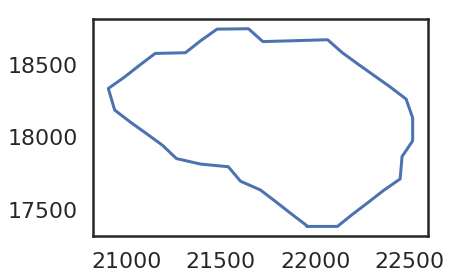

In [14]:
attr01=pd.read_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01_activeContourROI_4_RoiAttr_COORD.txt',
                  header='infer', sep='\t')

vtx=list(zip(attr01['x'], attr01['y']))
plt.plot(attr01['x'], attr01['y'])

In [11]:
# min and max coordinates
xlow=attr01.x.min()
xhigh=attr01.x.max()
ylow=attr01.y.min()
yhigh=attr01.y.max()

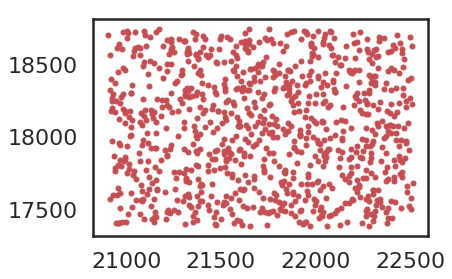

In [15]:
zx=np.random.uniform(low=xlow, high=xhigh, size=n)
zy=np.random.uniform(low=ylow, high=yhigh, size=n)
plt.plot(zx, zy, 'ro', markersize=5)